Original Github repo: https://github.com/srush/Tensor-Puzzles

In [1]:
from lib import draw_examples, make_test, run_test
import torch
import numpy as np
from torchtyping import TensorType as TT
tensor = torch.tensor

# Rules

These puzzles are about broadcasting. Know these rules:

![image](https://camo.githubusercontent.com/0e357993f12b491e152a01023c83d8aa0ba4ec9c90f7d7c4dd2a5e79194e28b2/68747470733a2f2f7062732e7477696d672e636f6d2f6d656469612f465179776f723057594173736e37593f666f726d61743d706e67266e616d653d6c61726765)

Each puzzle needs to be solved in 1 line (<80 columns) of code.

You are allowed @, arithmetic, comparison, shape, any indexing (e.g. a[:j], a[:, None], a[arange(10)]), and previous puzzle function.

You are not allowed anything else. No view, sum, take, squeeze, tenor.

You can start with these two functions:

# Warm up 1 - arange

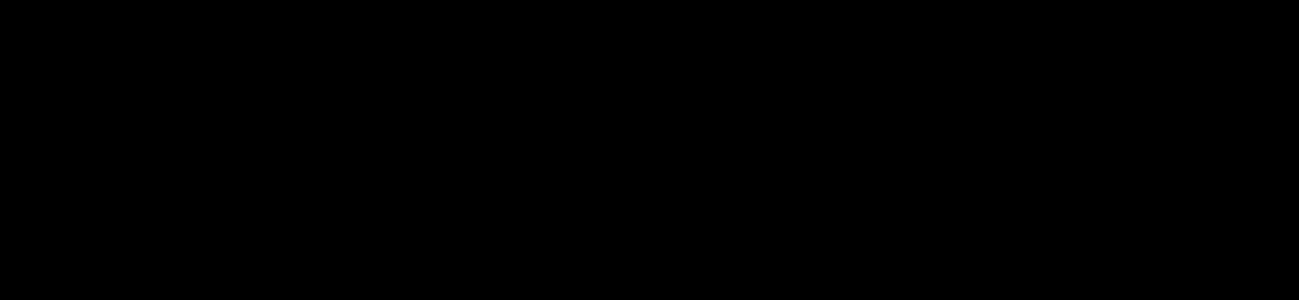

In [2]:
def arange(i: int):
    "Use this function to replace a for-loop."
    return torch.tensor(range(i))

draw_examples("arange", [{"" : arange(i)} for i in [5, 3, 2]])

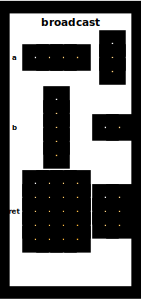

In [3]:
examples = [(arange(4), arange(5)[:, None]) ,
            (arange(3)[:, None], arange(2))]
draw_examples("broadcast", [{"a": a, "b": b, "ret": a + b} for a, b in examples])

# Warm up 2 - where

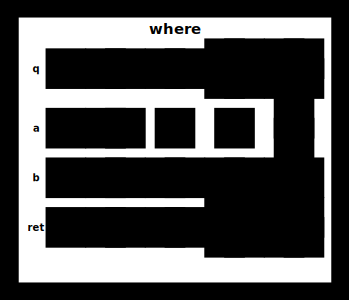

In [4]:
def where(q, a, b):
    "Use this function to replace an if-statement."
    return (q * a) + (~q) * b

# In diagrams, orange is positive/True, where is zero/False, and blue is negative.

examples = [(tensor([False]), tensor([10]), tensor([0])),
            (tensor([False, True]), tensor([1, 1]), tensor([-10, 0])),
            (tensor([False, True]), tensor([1]), tensor([-10, 0])),
            (tensor([[False, True], [True, False]]), tensor([1]), tensor([-10, 0])),
            (tensor([[False, True], [True, False]]), tensor([[0], [10]]), tensor([-10, 0])),
           ]
draw_examples("where", [{"q": q, "a":a, "b":b, "ret": where(q, a, b)} for q, a, b in examples])

# Puzzle 1 - ones

Compute the vector of all ones.

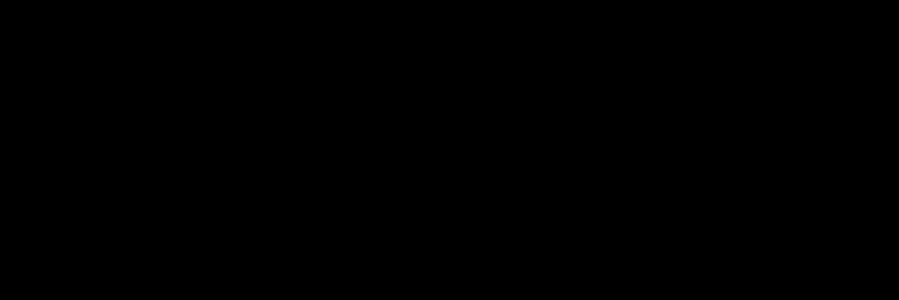

In [5]:
def ones_spec(out):
    for i in range(len(out)):
        out[i] = 1


def ones(i: int) -> TT["i"]:
    return tensor([1]*i)


#def ones(i: int) -> TT["i"]:
#    return torch.ones((i))


test_ones = make_test("ones", ones, ones_spec, add_sizes=["i"])

In [6]:
run_test(test_ones)

Correct!


# Puzzle 2 - sum

Compute the sum of a vector.


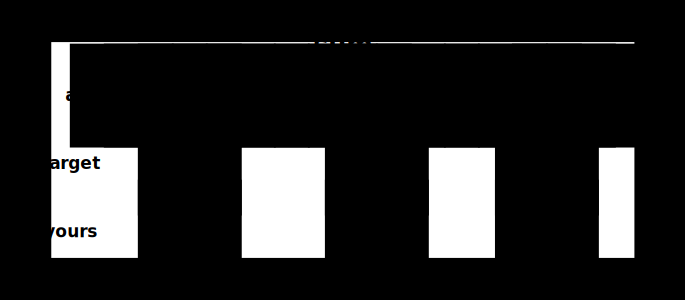

In [7]:
def sum_spec(a, out):
    out[0] = 0
    for i in range(len(a)):
        out[0] += a[i]


def sum(a: TT["i"]) -> TT[1]:
    return a @ ones(len(a))[:, None]


test_sum = make_test("sum", sum, sum_spec)

In [8]:
run_test(test_sum)

Correct!


# Puzzle 3 - outer

Compute the other product of two vectors.

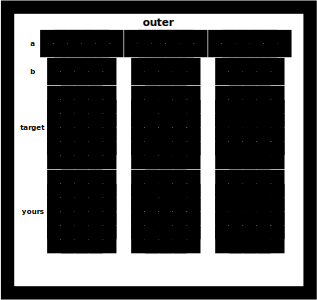

In [9]:
def outer_spec(a, b, out):
    for i in range(len(out)):
        for j in range(len(out[0])):
            out[i][j] = a[i] * b[j]


def outer(a: TT["i"], b: TT["j"]) -> TT["i", "j"]:
    return a[:, None]*b[None, :]


test_outer = make_test("outer", outer, outer_spec)

In [10]:
run_test(test_ones)

Correct!


# Puzzle 4 - diag 

Compute the diagonal vector of a square matrix.

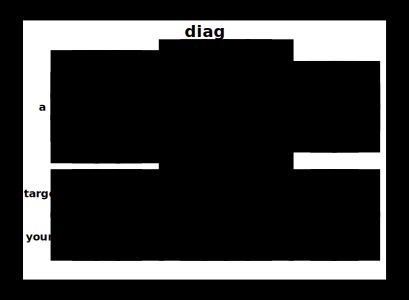

In [11]:
def diag_spec(a, out):
    for i in range(len(a)):
        out[i] = a[i][i]


def diag(a: TT["i", "i"]) -> TT["i"]:
    return a[[arange(len(a)), arange(len(a))]]


test_diag = make_test("diag", diag, diag_spec)

In [12]:
run_test(test_diag)

Correct!


# Puzzle 5 - eye
Compute the identity matrix.

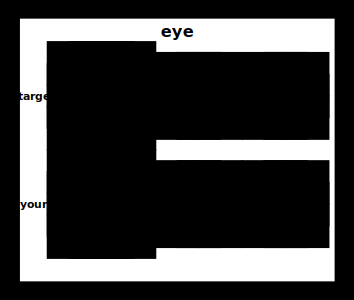

In [13]:
def eye_spec(out):
    for i in range(len(out)):
        out[i][i] = 1


def eye(j: int) -> TT["j", "j"]:
    return where(arange(j)[:, None] == arange(j)[None, :], 1, 0)


test_eye = make_test("eye", eye, eye_spec, add_sizes=["j"])

In [14]:
run_test(test_eye)

Correct!


# Puzzle 6 - triu

Compute the upper triangular matrix.

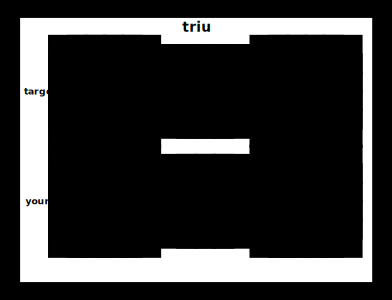

In [15]:
def triu_spec(out):
    for i in range(len(out)):
        for j in range(len(out)):
            if i <= j:
                out[i][j] = 1
            else:
                out[i][j] = 0
                
def triu(j: int) -> TT["j", "j"]:
    return where(arange(j)[:, None] <= arange(j)[None, :], 1, 0)


test_triu = make_test("triu", triu, triu_spec, add_sizes=["j"])

In [16]:
run_test(test_triu)

Correct!


# Puzzle 7 - cumsum

Compute the cumulative sum.

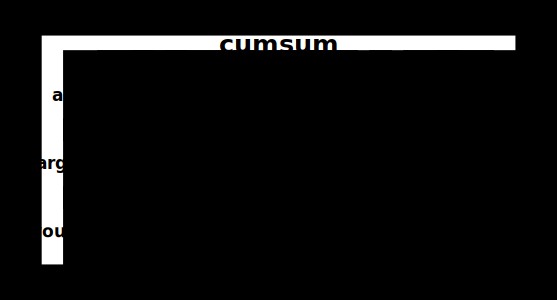

In [17]:
def cumsum_spec(a, out):
    total = 0
    for i in range(len(out)):
        out[i] = total + a[i]
        total += a[i]


def cumsum(a: TT["i"]) -> TT["i"]:
    return a @ triu(len(a))


test_cumsum = make_test("cumsum", cumsum, cumsum_spec)

In [18]:
run_test(test_cumsum)

Correct!


# Puzzle 8 - diff

Compute the running difference of a vector.

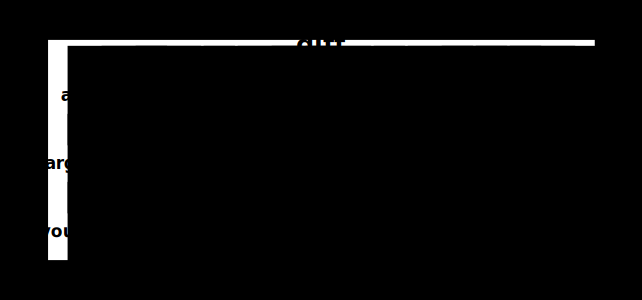

In [19]:
def diff_spec(a, out):
    out[0] = a[0]
    for i in range(1, len(out)):
        out[i] = a[i] - a[i - 1]


def diff(a: TT["i"], i: int) -> TT["i"]:
    return where(arange(i) == 0, a, a - a[cumsum(triu(i)[1, :]) - 1])


test_diff = make_test("diff", diff, diff_spec, add_sizes=["i"])

In [20]:
run_test(test_diff)

AttributeError: module 'IPython.lib.pretty' has no attribute '_deferred_pprinters'

# Puzzle 9 - vstack

Compute vstack - the horizontal concatenation of two row vectors.

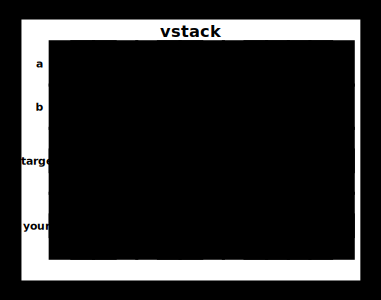

In [ ]:
def vstack_spec(a, b, out):
    for i in range(len(out[0])):
        out[0][i] = a[i]
        out[1][i] = b[i]

def vstack(a: TT["i"], b: TT["i"]) -> TT[2, "i"]:
    return where(arange(2)[:, None] == 0, a, b)


test_vstack = make_test("vstack", vstack, vstack_spec)

In [ ]:
run_test(test_vstack)

Correct!


# Puzzle 10 - roll

Compute roll - the vector shifted 1 circular position.

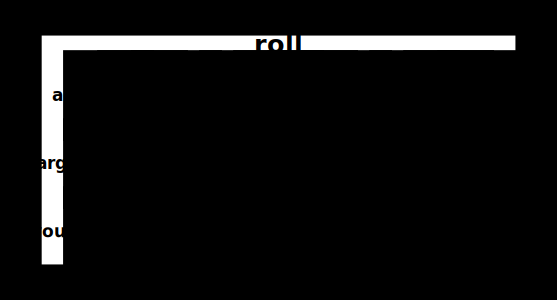

In [ ]:
def roll_spec(a, out):
    for i in range(len(out)):
        if i + 1 < len(out):
            out[i] = a[i + 1]
        else:
            out[i] = a[i + 1 - len(out)]


def roll(a: TT["i"], i: int) -> TT["i"]:
    return a[range(-i + 1, 1)]


test_roll = make_test("roll", roll, roll_spec, add_sizes=["i"])

In [ ]:
run_test(test_roll)

Correct!


# Puzzle 11 - flip

Compute flip - the reversed vector

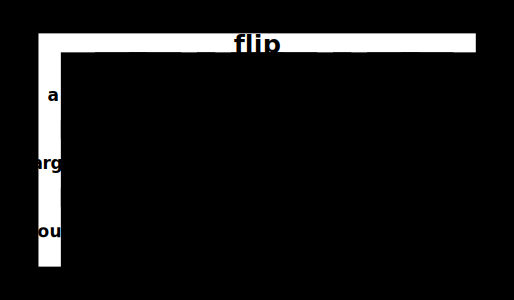

In [21]:
def flip_spec(a, out):
    for i in range(len(out)):
        out[i] = a[len(out) - i - 1]


def flip(a: TT["i"], i: int) -> TT["i"]:
    return a[range(i - 1, -1, -1)]


test_flip = make_test("flip", flip, flip_spec, add_sizes=["i"])

In [22]:
run_test(test_flip)

Correct!


# Puzzle 12 - compress

Compute compress - keep only masked entries (left-aligned).

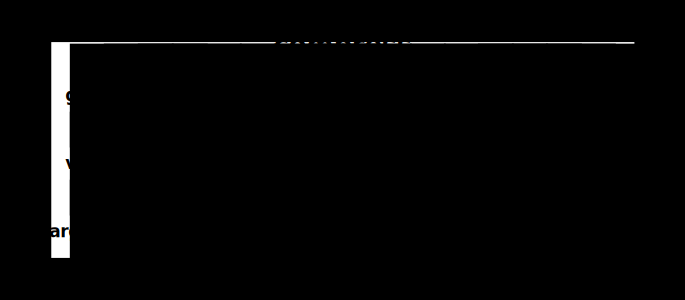

In [29]:
def compress_spec(g, v, out):
    j = 0
    for i in range(len(g)):
        if g[i]:
            out[j] = v[i]
            j += 1


def compress(g: TT["i", bool], v: TT["i"], i: int) -> TT["i"]:
    return


test_compress = make_test("compress", compress, compress_spec, add_sizes=["i"])

# Puzzle 13 - pad_to

Compute pad_to - eliminate or add 0s to change size of vector.

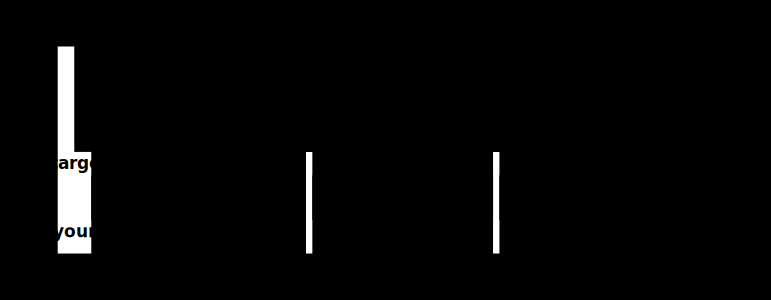

In [79]:
def pad_to_spec(a, out):
    for i in range(min(len(out), len(a))):
        out[i] = a[i]


def pad_to(a: TT["i"], i: int, j: int) -> TT["j"]:
    return where(arange(j) < i, a[arange(j) % i], 0)


test_pad_to = make_test("pad_to", pad_to, pad_to_spec, add_sizes=["i", "j"])

In [80]:
run_test(test_pad_to)

Correct!


# Puzzle 14 - sequence_mask

Compute sequence_mask - pad out to length per batch.

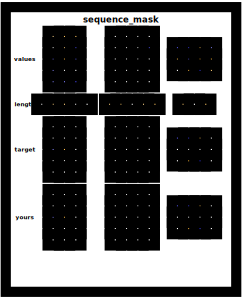

In [30]:
def sequence_mask_spec(values, length, out):
    for i in range(len(out)):
        for j in range(len(out[0])):
            if j < length[i]:
                out[i][j] = values[i][j]
            else:
                out[i][j] = 0


def sequence_mask(values: TT["i", "j"], length: TT["i", int]) -> TT["i", "j"]:
    return values*where(arange(values.shape[1]) < length[:, None], 1, 0)


def constraint_set_length(d):
    d["length"] = d["length"] % d["values"].shape[1]
    return d


test_sequence = make_test("sequence_mask",
    sequence_mask, sequence_mask_spec, constraint=constraint_set_length
)

In [31]:
run_test(test_sequence)

Correct!


# Puzzle 15 - bincount

Compute [bincount](https://numpy.org/doc/stable/reference/generated/numpy.bincount.html) - count number of times an entry was seen.

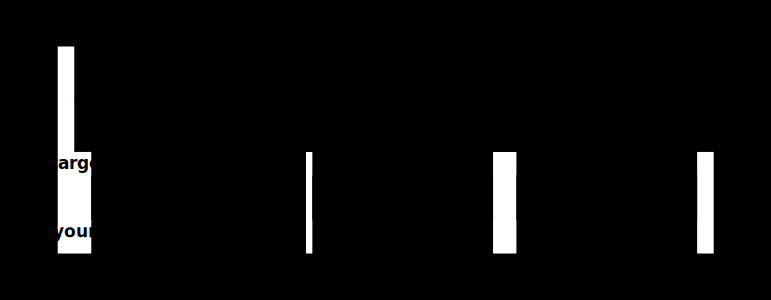

In [32]:
def bincount_spec(a, out):
    for i in range(len(a)):
        out[a[i]] += 1


def bincount(a: TT["i"], j: int) -> TT["j"]:
    return ones(len(a)) @ where(a[:, None] == arange(j), 1, 0)


def constraint_set_max(d):
    d["a"] = d["a"] % d["return"].shape[0]
    return d


test_bincount = make_test("bincount",
    bincount, bincount_spec, add_sizes=["j"], constraint=constraint_set_max
)

In [33]:
run_test(test_bincount)

Correct!


# Puzzle 16 - scatter_add

Compute scatter_add - add together values that link to the same location.

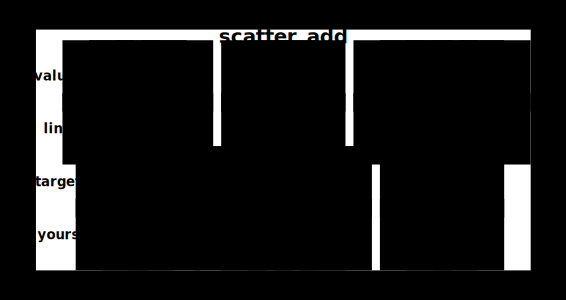

In [90]:
def scatter_add_spec(values, link, out):
    for j in range(len(values)):
        out[link[j]] += values[j]


def scatter_add(values: TT["i"], link: TT["i"], j: int) -> TT["j"]:
    return ones(len(values)) @ where(link[:, None] == arange(j), values[:, None], 0)


def constraint_set_max(d):
    d["link"] = d["link"] % d["return"].shape[0]
    return d


test_scatter_add = make_test("scatter_add",
    scatter_add, scatter_add_spec, add_sizes=["j"], constraint=constraint_set_max
)

In [91]:
run_test(test_scatter_add)

Correct!


# Puzzle 17 - flatten

Compute [flatten](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html).

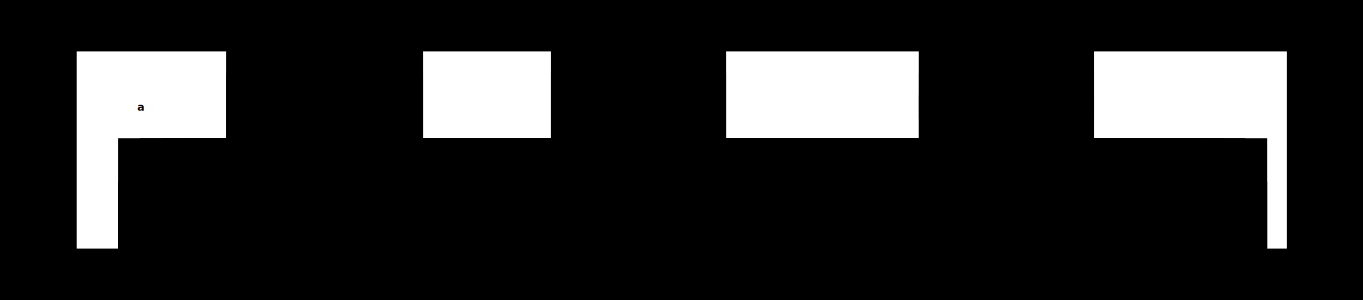

In [34]:
def flatten_spec(a, out):
    k = 0
    for i in range(len(a)):
        for j in range(len(a[0])):
            out[k] = a[i][j]
            k += 1


def flatten(a: TT["i", "j"], i: int, j: int) -> TT["i * j"]:
    return a[[arange(i*j) // j, arange(i*j) % j]]


test_flatten = make_test("flatten", flatten, flatten_spec, add_sizes=["i", "j"])

In [35]:
run_test(test_flatten)

Correct!


# Puzzle 18 - linspace

Compute [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html).

/tmp/ipykernel_3853/133170757.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[k] = float(i + (j - i) * k / max(1, len(out) - 1))
/tmp/ipykernel_3853/133170757.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[k] = float(i + (j - i) * k / max(1, len(out) - 1))
/tmp/ipykernel_3853/133170757.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[k] = float(i + (j - i) * k / max(1, len(out) - 1))


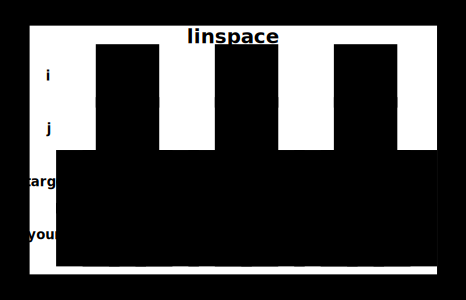

In [36]:
def linspace_spec(i, j, out):
    for k in range(len(out)):
        out[k] = float(i + (j - i) * k / max(1, len(out) - 1))


def linspace(i: TT[1], j: TT[1], n: int) -> TT["n", float]:
    return ones(n)*i + (j - i)*(cumsum(ones(n)) - 1)/(n - 1)


test_linspace = make_test("linspace", linspace, linspace_spec, add_sizes=["n"])

In [37]:
run_test(test_linspace)

/tmp/ipykernel_3853/133170757.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[k] = float(i + (j - i) * k / max(1, len(out) - 1))
/tmp/ipykernel_3853/133170757.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[k] = float(i + (j - i) * k / max(1, len(out) - 1))
/tmp/ipykernel_3853/133170757.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[k] = float(i + (j - i) * k / max(1, len(out) - 1))
/tmp/ipykernel_3853/133170757.py:3: DeprecationWarning: Co

AttributeError: module 'IPython.lib.pretty' has no attribute '_deferred_pprinters'

# Puzzle 19 - heaviside

Compute [heaviside](https://numpy.org/doc/stable/reference/generated/numpy.heaviside.html).

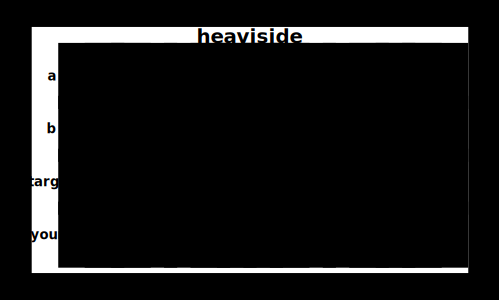

In [38]:
def heaviside_spec(a, b, out):
    for k in range(len(out)):
        if a[k] == 0:
            out[k] = b[k]
        else:
            out[k] = int(a[k] > 0)


def heaviside(a: TT["i"], b: TT["i"]) -> TT["i"]:
    return where(a > 0, 1, where(a == 0, b, 0))


test_heaviside = make_test("heaviside", heaviside, heaviside_spec)

In [39]:
run_test(test_heaviside)

Correct!


# Puzzle 20 - repeat (1d)

Compute the repetition of a vector.

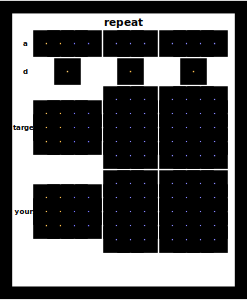

In [40]:
def repeat_spec(a, d, out):
    for i in range(d[0]):
        for k in range(len(a)):
            out[i][k] = a[k]


def constraint_set(d):
    d["d"][0] = d["return"].shape[0]
    return d


def repeat(a: TT["i"], d: TT[1]) -> TT["d", "i"]:
    return outer(ones(d[0]), a)
    

test_repeat = make_test("repeat", repeat, repeat_spec, constraint=constraint_set)

In [41]:
run_test(test_repeat)

Correct!


# Puzzle 21 - bucketize
Compute [bucketize](https://pytorch.org/docs/stable/generated/torch.bucketize.html).

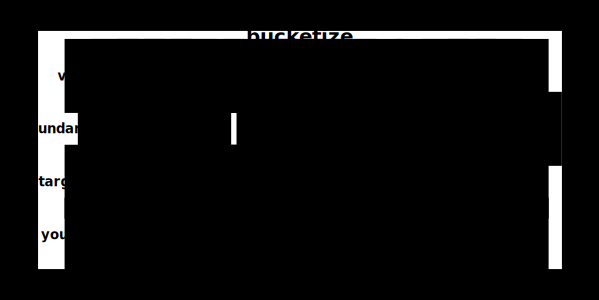

In [42]:
def bucketize_spec(v, boundaries, out):
    for i, val in enumerate(v):
        out[i] = 0
        for j in range(len(boundaries)-1):
            if val >= boundaries[j]:
                out[i] = j + 1
        if val >= boundaries[-1]:
            out[i] = len(boundaries)


def constraint_set(d):
    d["boundaries"] = np.abs(d["boundaries"]).cumsum()
    return d

            
def bucketize(v: TT["i"], boundaries: TT["j"]) -> TT["i"]:
    return ones(len(boundaries)) @ where(boundaries[:, None] <= v, 1, 0)



test_bucketize = make_test("bucketize", bucketize, bucketize_spec,
                           constraint=constraint_set)

In [43]:
run_test(test_bucketize)

Correct!


# Inspect the # of characters of each solution

The length for each should be <= 80 to make it a one-liner.

In [94]:
import inspect
fns = (ones, sum, outer, diag, eye, triu, cumsum, diff, vstack, roll, flip,
       compress, pad_to, sequence_mask, bincount, scatter_add, flatten, 
       linspace, heaviside, repeat, bucketize
)

for fn in fns:
    lines = [l for l in inspect.getsource(fn).split("\n") if not l.strip().startswith("#")]
    
    if len(lines) > 3:
        print(fn.__name__, len(lines[2]), "(more than 1 line)")
    else:
        print(fn.__name__, len(lines[1]))

ones 24
sum 36
outer 32
diag 51
eye 64
triu 64
cumsum 27
diff 69
vstack 47
roll 30
flip 34
compress 29
pad_to 52
sequence_mask 72
bincount 62
scatter_add 84
flatten 49
linspace 60
heaviside 47
repeat 31
bucketize 72
